In [41]:
import numpy as np
import stan
import arviz as az
import seaborn as sns
import matplotlib.pyplot as plt
import nest_asyncio
nest_asyncio.apply()

In [42]:
# Provided parameters
N = 100
alpha = 2.3
sigma = 2.
slope = 4.
x = np.random.normal(size = N)
y = alpha + slope * x + sigma * np.random.normal(size = N)

In [ ]:
# Building the stan model
data = {
    'N': N, 
    'x': x, 
    'y': y
}

vectorized_program_code = """
data {
    int<lower=0> N;         
    vector[N] x;            
    vector[N] y;            
}

parameters {
    real alpha;             
    real beta;              
    real<lower=0> sigma2;
}

model {
    alpha ~ normal(0, 10);
    beta ~ normal(0, 10);
    sigma2 ~ inv_gamma(1, 1);
    y ~ normal(alpha + beta * x, sqrt(sigma2));
}
"""

stanModel = stan.build(vectorized_program_code, data = data)
vectorizedFit = stanModel.sample(num_chains = 4, num_samples = 2000, num_warmup = 1000)

Building...



Building: found in cache, done.Sampling:   0%
Sampling:  25% (3000/12000)
Sampling:  50% (6000/12000)
Sampling:  75% (9000/12000)
Sampling: 100% (12000/12000)
Sampling: 100% (12000/12000), done.
Messages received during sampling:
  Gradient evaluation took 3.8e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.38 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 8.1e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.81 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 1.2e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.12 seconds.
  Adjust your expectations accordingly!
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in '/tmp/httpstan_as2_bnhw/model_egkwcsp2.stan', line 18, column 4 to column 47)
  If t

In [44]:
# Show data numerically
summary = az.summary(vectorizedFit)
summary

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
alpha,2.284,0.196,1.912,2.654,0.002,0.002,7668.0,5507.0,1.0
beta,4.027,0.186,3.684,4.373,0.002,0.002,7704.0,5793.0,1.0
sigma2,3.840,0.559,2.882,4.922,0.007,0.005,7275.0,5903.0,1.0


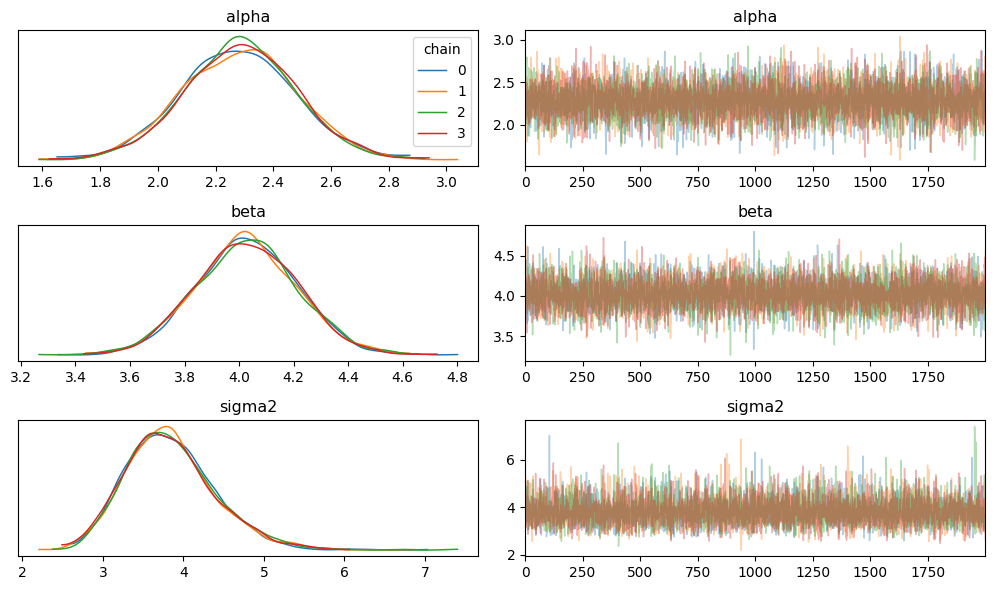

In [45]:
# Show data graphically
f = az.plot_trace(vectorizedFit, var_names = ['alpha', 'beta', 'sigma2'], figsize = (10, 6), compact = False, legend = True)
plt.tight_layout()

## How accurate are the posterior means and how much uncertainty is left?

Alpha: The posterior mean is 2.284 with an HDI range of 1.912 to 2.654. The true alpha is 2.3, which is within the HDI range and the posterior mean is only slightly smaller than the true alpha. This shows that the model estimates accurately and has low uncertainty.

Beta: The posterior mean is 4.027 with an HDI range of 3.684 to 4.373. The true beta (slope) is 4., which is within the HDI range and the posterior mean is only slightly larger than the true alpha. This shows that the model estimates accurately and has low uncertainty.

Sigma2: The posterior mean is 3.840 with an HDI range of 2.882 to 4.922. The true sigma2 (sigma^2) is 4. (2. * 2.), which is within the HDI range. However, we can see from the graphs for sigma2 that the results are slightly skewed to the lower bound of the HDI range, which shows that there was a slight underestimation.

Between the alpha, beta, and sigma2 values, it can be said that each fall within their respective HDI ranges and for the most part are in the middle of their ranges. The standard deviations for alpha and beta are 1.96 and 1.86 respectively, while the sigma2 standard deviation is 0.559. This checks as the upper and lower bounds for alpha and beta differ by around 0.7, where as the upper and lower bounds of sigma2 differ by around 2.1, showing that even though the standard deviation for sigma2 is around 3x that of alpha and beta, its range is also on that same scale. We can see through the charts that the results are typically symmetrical, generally falling to the center of their ranges. Finally, the r_hat values of 1.0 on alpha, beta, and sigma suggest that the data converged correctly.

In [77]:
# Repeating analysis with 10 times as many observations
N2 = N * 10
x2 = np.random.normal(size = N2)
y2 = alpha + slope * x2 + sigma * np.random.normal(size = N2)
# alpha, sigma, and slope remain the same

In [78]:
# Building the stan model
data2 = {
    'N': N2, 
    'x': x2, 
    'y': y2
}
stanModel = stan.build(vectorized_program_code, data = data2)
vectorizedFit2 = stanModel.sample(num_chains = 4, num_samples = 2000, num_warmup = 1000)

Building...



Building: found in cache, done.Sampling:   0%
Sampling:  25% (3000/12000)
Sampling:  50% (6000/12000)
Sampling:  75% (9000/12000)
Sampling: 100% (12000/12000)
Sampling: 100% (12000/12000), done.
Messages received during sampling:
  Gradient evaluation took 0.00104 seconds
  1000 transitions using 10 leapfrog steps per transition would take 10.4 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 0.000106 seconds
  1000 transitions using 10 leapfrog steps per transition would take 1.06 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 0.000123 seconds
  1000 transitions using 10 leapfrog steps per transition would take 1.23 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 8.7e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.87 seconds.
  Adjust your expectations accordingly!


In [79]:
# Show data numerically
summary2 = az.summary(vectorizedFit2)
summary2

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
alpha,2.294,0.061,2.182,2.409,0.001,0.000,8265.0,6307.0,1.0
beta,3.920,0.060,3.804,4.026,0.001,0.000,8071.0,6038.0,1.0
sigma2,3.753,0.167,3.432,4.061,0.002,0.001,8836.0,5765.0,1.0


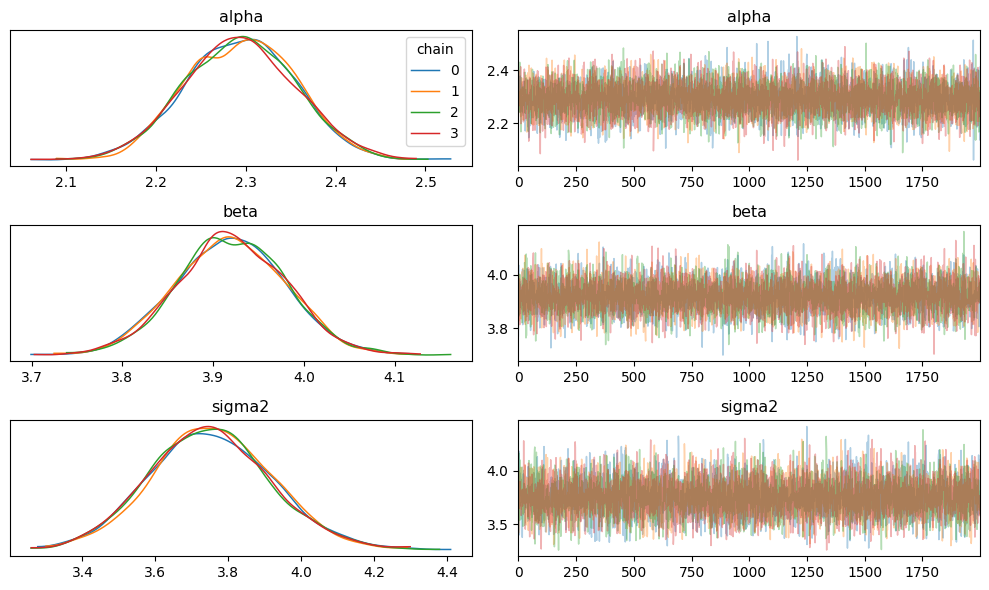

In [80]:
# Show data graphically
f = az.plot_trace(vectorizedFit2, var_names = ['alpha', 'beta', 'sigma2'], figsize = (10, 6), compact = False, legend = True)
plt.tight_layout()

## After repeating the analysis with ten times as many observations, what happens to the precision and uncertainty?

Alpha: The posterior mean is now 2.294 (2.284 previously) with an HDI range of 2.182 to 2.409 (1.912 to 2.654 previously). The true alpha is 2.3, which is within the HDI range and the posterior mean is only slightly smaller than the true alpha, but still closer to the true value than before. The standard deviation is now 0.061 (0.196 previously). We can see that the standard deviation became smaller and HDI range became stricter, suggesting increased precision and a reduction in the estimate's uncertainty.

Beta: The posterior mean is now 3.920 (4.027 previously) with an HDI range of 3.804 to 4.026 (3.684 to 4.373 previously). The true beta (slope) is 4., which is within the HDI range and the posterior mean is only slightly smaller than the true beta, but also slightly farther from the true value than before. The standard deviation is now 0.060 (0.186 previously). We can see that the standard deviation became smaller and HDI range became stricter, suggesting increased precision and a reduction in the estimate's uncertainty.

Beta: The posterior mean is now 3.753 (3.840 previously) with an HDI range of 3.432 to 4.061 (2.882 to 4.922 previously). The true sigma2 (sigma^2) is 4. (2. * 2.), which is within the HDI range and the posterior mean is only slightly smaller than the true sigma2, but also slightly farther from the true value than before. The standard deviation is now 0.167 (0.559 previously). We can see that the standard deviation became smaller and HDI range became stricter, suggesting increased precision and a reduction in the estimate's uncertainty.

While the posterior means of beta and sigma2 moved slightly farther away from their true values respectively, this movement was in both cases less than 0.1. However, we can confidently say that across the board, alpha, beta, and sigma2, all gained further precision and less uncertainty in their results due to a stricter HDI range and standard deviation.